In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/1.cancer/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [4]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


데이터 시각화

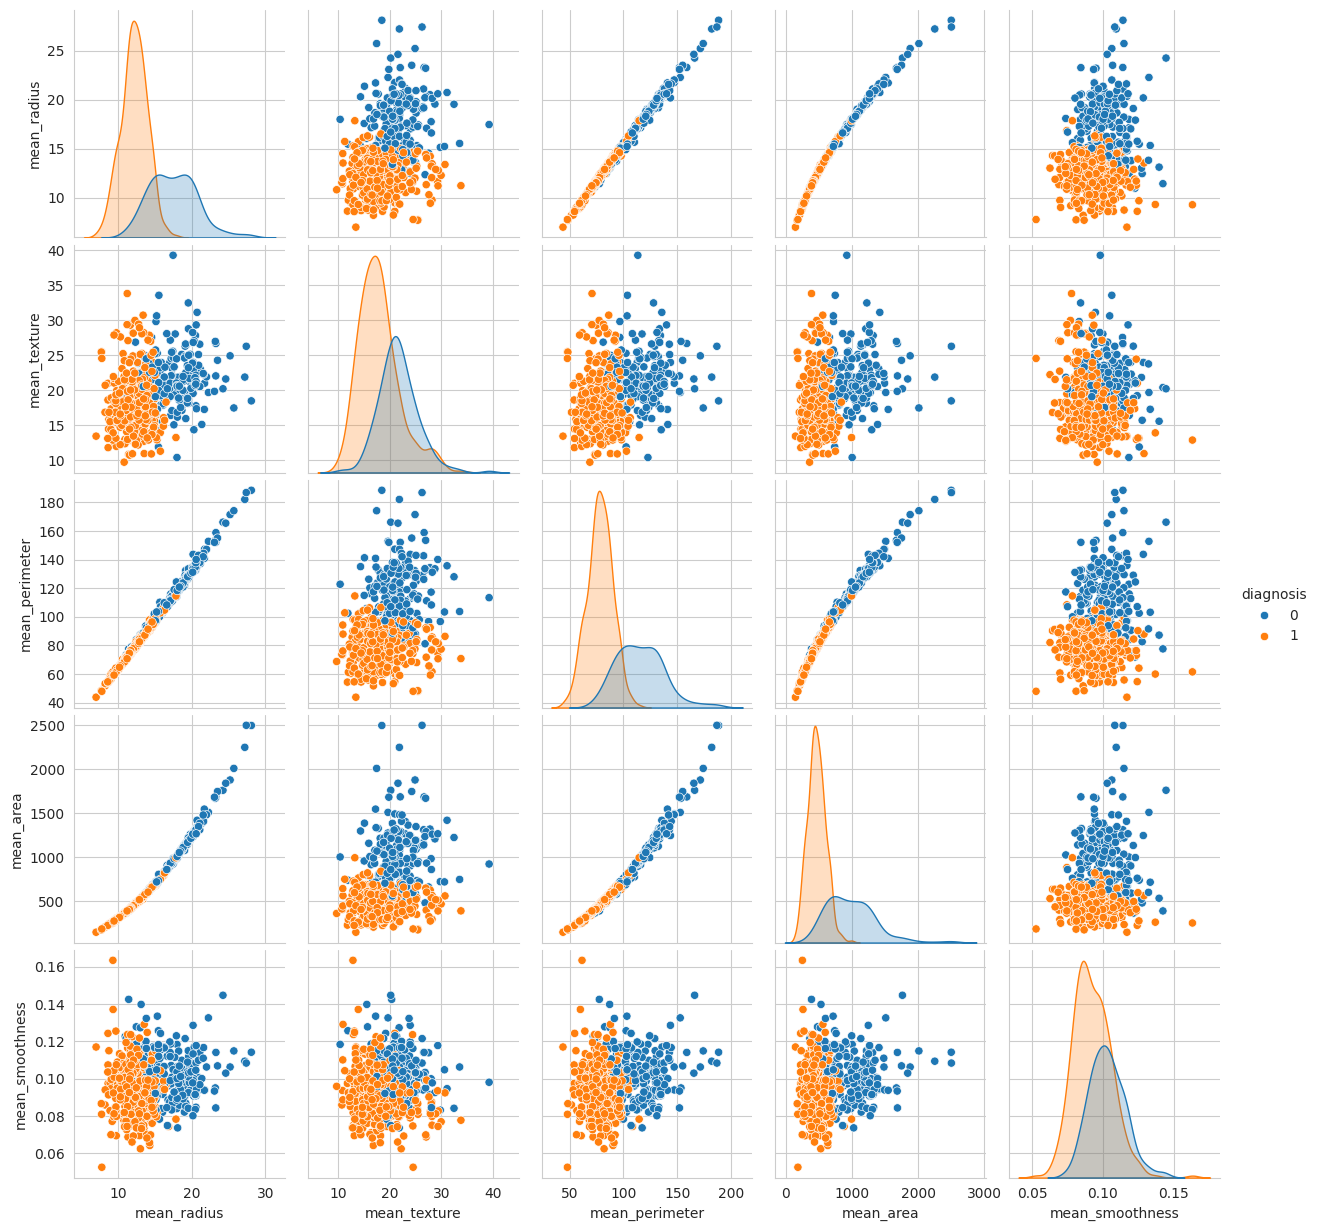

In [5]:
sns.pairplot(df, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'])

<Axes: xlabel='mean_area', ylabel='mean_smoothness'>

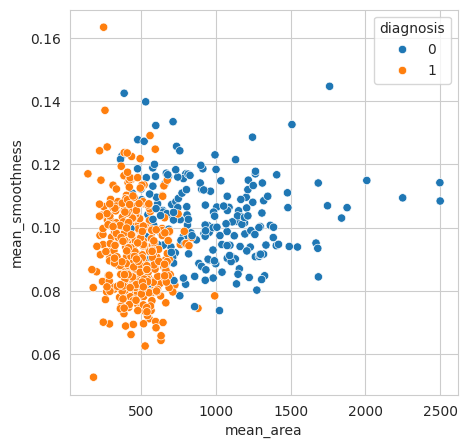

In [8]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'mean_area', y = 'mean_smoothness', hue = 'diagnosis', data = df)

<Axes: >

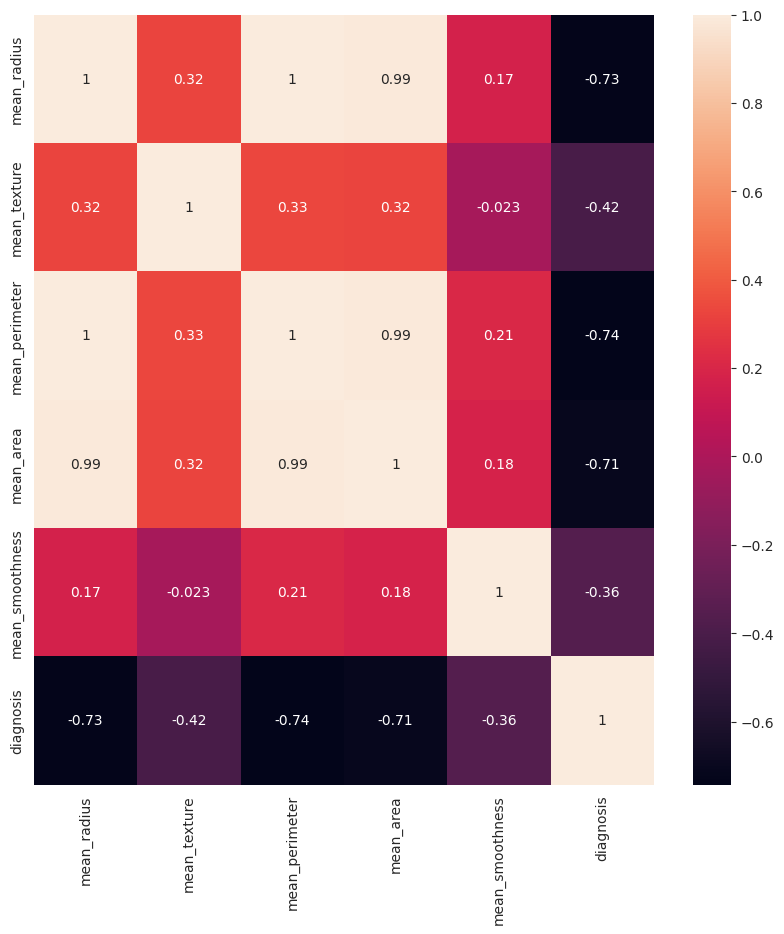

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

모델 트레이닝

In [14]:
#학습용 데이터와 테스트용 데이터 분리
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X= df.drop('diagnosis', axis=1)
y= df.diagnosis

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (569, 5)
'y' shape: (569,)


In [16]:
#정확도와 예측결과와 실제값의 관계를 행렬로 표현
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [17]:
#support vector machine -> 분류 문제
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 80.90%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.766154  0.809045    0.883077      0.853699
recall       0.489933    1.000000  0.809045    0.744966      0.809045
f1-score     0.657658    0.867596  0.809045    0.762627      0.789001
support    149.000000  249.000000  0.809045  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[ 73  76]
 [  0 249]]

Test Result:
Accuracy Score: 80.70%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.765957  0.807018    0.882979      0.852184
recall      0.476190    1.000000  0.807018    0.738095      0.807018
f1-score    0.645161    0.867470  0.807018    0.756316      0.785567
support    63.000000  108.000000  0.807018  171.000000    171.00000

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
#다양한 커널(kernel)을 사용해 데이터의 비선형 관계를 학습
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.908451    0.921875  0.917085    0.915163      0.916849
recall       0.865772    0.947791  0.917085    0.906781      0.917085
f1-score     0.886598    0.934653  0.917085    0.910626      0.916663
support    149.000000  249.000000  0.917085  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [ 13 236]]

Test Result:
Accuracy Score: 94.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.907692    0.962264   0.94152    0.934978      0.942159
recall      0.936508    0.944444   0.94152    0.940476      0.941520
f1-score    0.921875    0.953271   0.94152    0.937573      0.941704
support    63.000000  108.000000   0.94152  171.000000    171.00000

In [28]:
#rbf-> 가우시안 커널
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.968750    0.907407  0.927136    0.938079      0.930372
recall       0.832215    0.983936  0.927136    0.908075      0.927136
f1-score     0.895307    0.944123  0.927136    0.919715      0.925848
support    149.000000  249.000000  0.927136  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[124  25]
 [  4 245]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   1.000000    0.923077  0.947368    0.961538      0.951417
recall      0.857143    1.000000  0.947368    0.928571      0.947368
f1-score    0.923077    0.960000  0.947368    0.941538      0.946397
support    63.000000  108.000000  0.947368  171.000000    171.00000

In [20]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [21]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
Accuracy Score: 92.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934783    0.923077  0.927136    0.928930      0.927459
recall       0.865772    0.963855  0.927136    0.914814      0.927136
f1-score     0.898955    0.943026  0.927136    0.920990      0.926527
support    149.000000  249.000000  0.927136  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [  9 240]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.950000    0.945946  0.947368    0.947973      0.947440
recall      0.904762    0.972222  0.947368    0.938492      0.947368
f1-score    0.926829    0.958904  0.947368    0.942867      0.947087


In [22]:
#모델, 하이퍼파라미터, 교차 검증 설정
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 92.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.934783    0.923077  0.927136    0.928930      0.927459
recall       0.865772    0.963855  0.927136    0.914814      0.927136
f1-score     0.898955    0.943026  0.927136    0.920990      0.926527
support    149.000000  249.000000  0.927136  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [  9 240]]

Test Result:
Accuracy Score: 94.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.950000    0.945946  0.947368    0.947973      0.947440
recall      0.904762    0.972222  0.947368    0.938492      0.947368
f1-score    0.92682

In [23]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [24]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#pca 입력 데이터 차원 축소 표준화
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

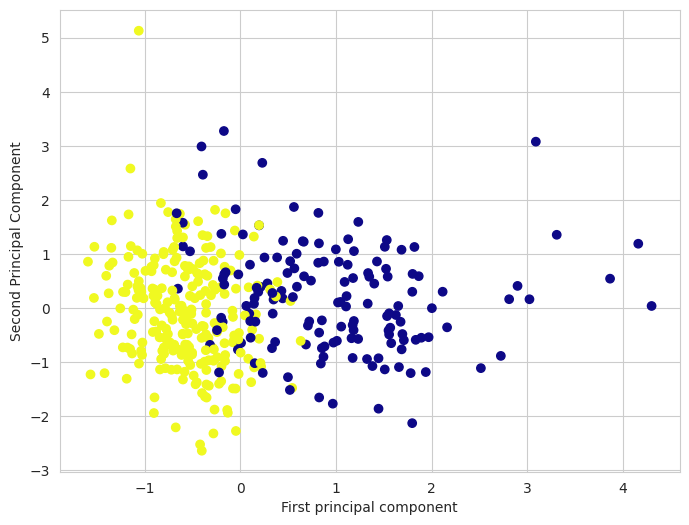

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Train Result:
Accuracy Score: 92.46%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.928058    0.922780  0.924623    0.925419      0.924756
recall       0.865772    0.959839  0.924623    0.912806      0.924623
f1-score     0.895833    0.940945  0.924623    0.918389      0.924056
support    149.000000  249.000000  0.924623  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[129  20]
 [ 10 239]]

Test Result:
Accuracy Score: 94.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.934426    0.945455   0.94152    0.939940      0.941391
recall      0.904762    0.962963   0.94152    0.933862      0.941520
f1-score    0.9193